### Introduction
In this exercise you will use the k-Means clustering method, as well as the PCA dimensionality reduction method on a hyperspectral image.


### 1. Load hyperspectral image

Download the hyperspectral image `indian_pines_corrected.npy` and the corresponding annotations `indian_pines_gt.npy`.

1.a. Load the image using the numpy.load function


Shape of hyperspectral image: (145, 145, 200)


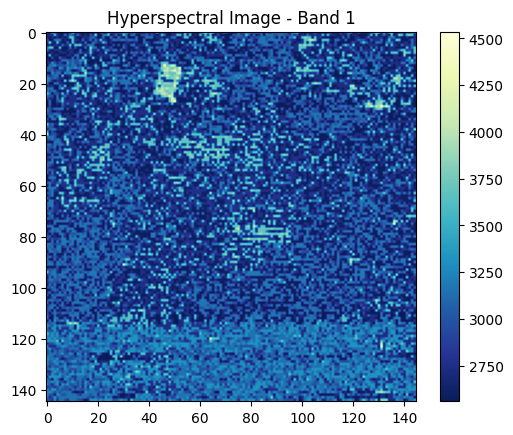

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Specify the file name
fname = "indian_pines_corrected.npy"

# Get the current working directory
cwd = os.getcwd()

# Create the full file path by joining the current directory and the file name
filepath = os.path.join(cwd, fname)

# Load the hyperspectral image using numpy.load
hsi = np.load(filepath)

# Print the shape of the hyperspectral image
print("Shape of hyperspectral image:", hsi.shape)

# Display the first band of the hyperspectral image as an example
band = 0
plt.imshow(hsi[:, :, band], cmap='YlGnBu_r')
plt.title(f'Hyperspectral Image - Band {band + 1}')
plt.colorbar()
plt.show()


1.b. Using the same function, load the corresponding annotations per pixel image `indian_pines_gt.npy`. These labels assign each pixel of the hyperspectral image to one of 17 different classes (label 0 corresponds to "Undefined"):

```python
classes = [
    "Undefined",
    "Alfalfa",
    "Corn-notill",
    "Corn-mintill",
    "Corn",
    "Grass-pasture",
    "Grass-trees",
    "Grass-pasture-mowed",
    "Hay-windrowed",
    "Oats",
    "Soybean-notill",
    "Soybean-mintill",
    "Soybean-clean",
    "Wheat",
    "Woods",
    "Buildings-Grass-Trees-Drives",
    "Stone-Steel-Towers"
]
```

In [3]:
# Specify the ground truth file name
gt_fname = "indian_pines_gt.npy"

# Create the full ground truth file path
gt_filepath = os.path.join(cwd, gt_fname)

# Load the ground truth annotations using numpy.load
annots = np.load(gt_filepath)

# Define the class names
classes = [
    "Undefined",
    "Alfalfa",
    "Corn-notill",
    "Corn-mintill",
    "Corn",
    "Grass-pasture",
    "Grass-trees",
    "Grass-pasture-mowed",
    "Hay-windrowed",
    "Oats",
    "Soybean-notill",
    "Soybean-mintill",
    "Soybean-clean",
    "Wheat",
    "Woods",
    "Buildings-Grass-Trees-Drives",
    "Stone-Steel-Towers"
]

# Print unique values in the annotations array (representing different classes)
unique_classes = np.unique(annots)
print("Class IDs and corresponding Class Names:")
for c_id in unique_classes:
    print(f"{c_id}: {classes[c_id]}")


Class IDs and corresponding Class Names:
0: Undefined
1: Alfalfa
2: Corn-notill
3: Corn-mintill
4: Corn
5: Grass-pasture
6: Grass-trees
7: Grass-pasture-mowed
8: Hay-windrowed
9: Oats
10: Soybean-notill
11: Soybean-mintill
12: Soybean-clean
13: Wheat
14: Woods
15: Buildings-Grass-Trees-Drives
16: Stone-Steel-Towers


### 2. Visualization and Exploratory data analysis

Use code to present information about:

2a. Find the height and width of the image, as well as the number of hyperspectral channels

2b. Plot using matplotlib the 3rd, 65th, and 95th channels of the image

2c. Count the number of different crop/class categories in the annotations

2d. Plot using matplotlib the labels in image format. Add additional explanatory caption using each annotation's library (use the `classes' list provided earlier).

2e. Calculate how many pixels of the image correspond to each type of crop

In [4]:
#2a. Find the height and width of the image, as well as the number of hyperspectral channels
h, w, c = hsi.shape
print(f"Height: {h}, Width: {w}, Channels: {c}")


Height: 145, Width: 145, Channels: 200


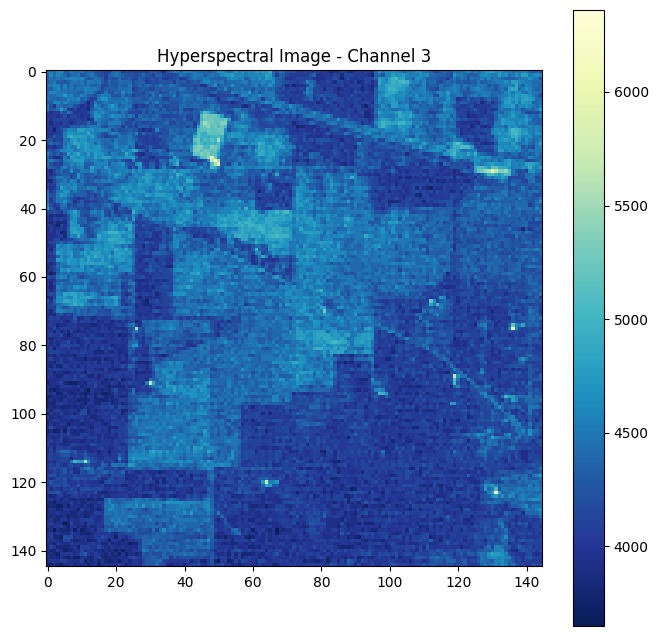

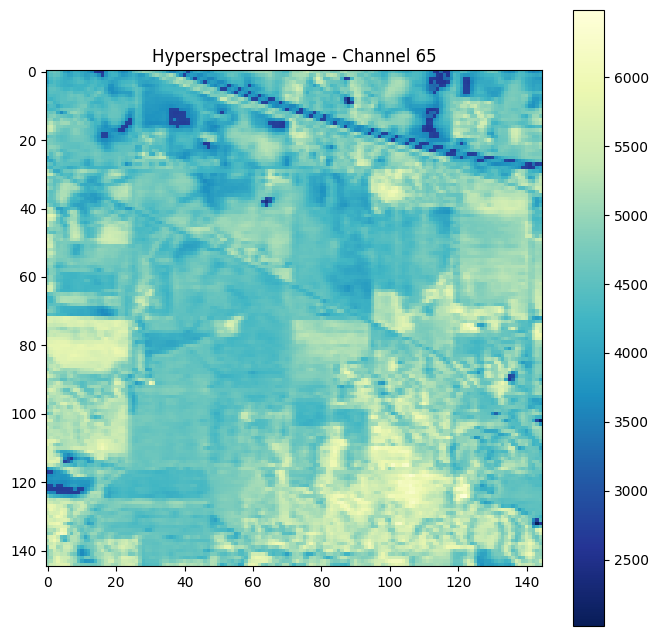

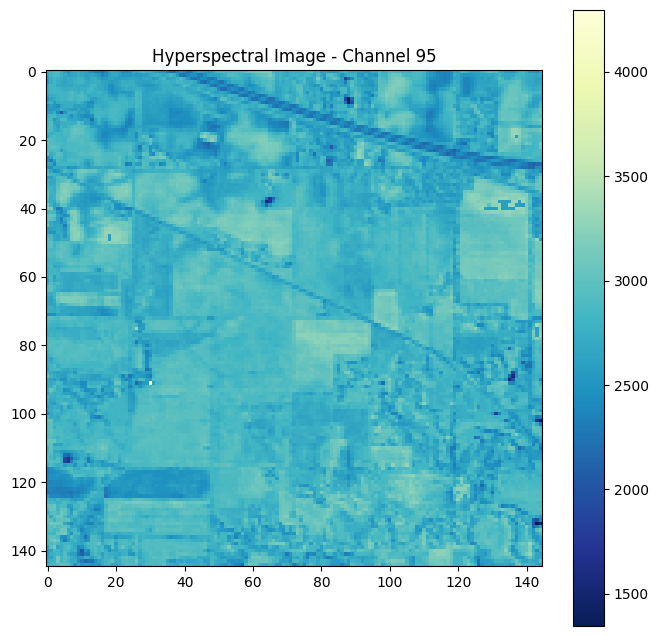

In [5]:
# Channels to plot
channels_to_plot = [2, 64, 94]

# Plot each channel
for ch in channels_to_plot:
    plt.figure(figsize=(8, 8))
    plt.imshow(hsi[:, :, ch], cmap='YlGnBu_r')
    plt.title(f'Hyperspectral Image - Channel {ch + 1}')
    plt.colorbar()
    plt.show()


In [6]:
# 2c. Count the number of different crop/class categories in the annotations

# Count the unique crop/class categories
num_classes = len(unique_classes)

print("Unique crop/class categories in the annotations:")
for c_id in unique_classes:
    print(f"{classes[c_id]} ({c_id})")

# Print the total number of unique crop/class categories
print(f"\nTotal number of unique crop/class categories: {num_classes}")



Unique crop/class categories in the annotations:
Undefined (0)
Alfalfa (1)
Corn-notill (2)
Corn-mintill (3)
Corn (4)
Grass-pasture (5)
Grass-trees (6)
Grass-pasture-mowed (7)
Hay-windrowed (8)
Oats (9)
Soybean-notill (10)
Soybean-mintill (11)
Soybean-clean (12)
Wheat (13)
Woods (14)
Buildings-Grass-Trees-Drives (15)
Stone-Steel-Towers (16)

Total number of unique crop/class categories: 17


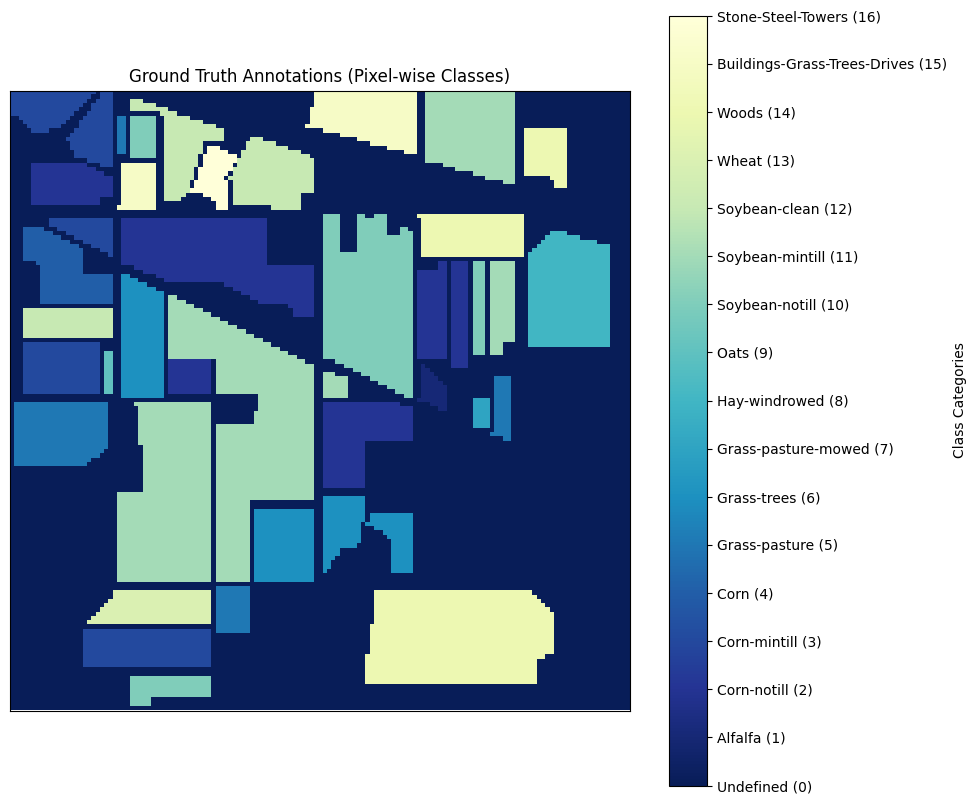

In [7]:
# 2d. Plot using matplotlib the labels in image format

plt.figure(figsize=(10, 10))
plt.imshow(annots, cmap='YlGnBu_r')

# Add explanatory captions using the classes list
tick_labels = [f"{classes[c_id]} ({c_id})" for c_id in unique_classes]
plt.colorbar(ticks=unique_classes, label="Class Categories").set_ticklabels(tick_labels)

plt.title('Ground Truth Annotations (Pixel-wise Classes)')
plt.xticks([], [])
plt.yticks([], [])
plt.show()




In [8]:
# 2e. Calculate how many pixels of the image correspond to each type of crop

pixels_per_type = {classes[c_id]: np.sum(annots == c_id) for c_id in unique_classes}

print("Pixels per Crop Type:")
for crop_type, count in pixels_per_type.items():
    print(f"{crop_type}: {count} pixels")


Pixels per Crop Type:
Undefined: 10776 pixels
Alfalfa: 46 pixels
Corn-notill: 1428 pixels
Corn-mintill: 830 pixels
Corn: 237 pixels
Grass-pasture: 483 pixels
Grass-trees: 730 pixels
Grass-pasture-mowed: 28 pixels
Hay-windrowed: 478 pixels
Oats: 20 pixels
Soybean-notill: 972 pixels
Soybean-mintill: 2455 pixels
Soybean-clean: 593 pixels
Wheat: 205 pixels
Woods: 1265 pixels
Buildings-Grass-Trees-Drives: 386 pixels
Stone-Steel-Towers: 93 pixels


### 3. Finding spectral signatures

3.a. Convert the hyperspectral image and annotations to a format suitable for further processing. The image should be converted to an N x K matrix, where N is the number of pixels and K is the number of channels. The labels respectively should be converted to a vector of length N. Then remove any data marked as `Undefined`.

💡 Use `numpy reshape`

In [9]:
# Reshape the hyperspectral image and annotations

reshaped_img = hsi.reshape(-1, len(hsi[0][0][:]))   #The -1 argument in the reshape function means that the size of that dimension is inferred so that the total number of elements remains the same. The second argument specifies the size of the second dimension.
reshaped_annots = annots.reshape(annots.size)       #This line flattens the annotations array into a 1D array.

filtered_img = []
filtered_annots = []
for pixel in range(len(reshaped_annots)):           #Filtering "Undefined" annotations
    if reshaped_annots[pixel] > 0:
        filtered_img.append(reshaped_img[pixel])
        filtered_annots.append(reshaped_annots[pixel])

filtered_img = np.vstack(filtered_img)
filtered_annots = np.array(filtered_annots)

# Print the shape of the cleaned data
print("Shape of cleaned hyperspectral image:", filtered_img.shape)
print("Shape of cleaned annotations:", filtered_annots.shape)

Shape of cleaned hyperspectral image: (10249, 200)
Shape of cleaned annotations: (10249,)


3.b. Select a random image pixel from each category, either programmatically or manually.

In [10]:
# Select a random pixel for each category
rand_pixels = []

for c_id in unique_classes:
    class_pixels = np.where(filtered_annots == c_id)[0]
    
    # Check if class_pixels is not empty before selecting a random pixel
    if len(class_pixels) > 0:
        rand_pixel_index = np.random.choice(class_pixels)
        rand_pixel = filtered_img[rand_pixel_index]
        rand_pixels.append((c_id, rand_pixel))


3.c. Write code to plot the hyperspectral signature of the selected pixels.

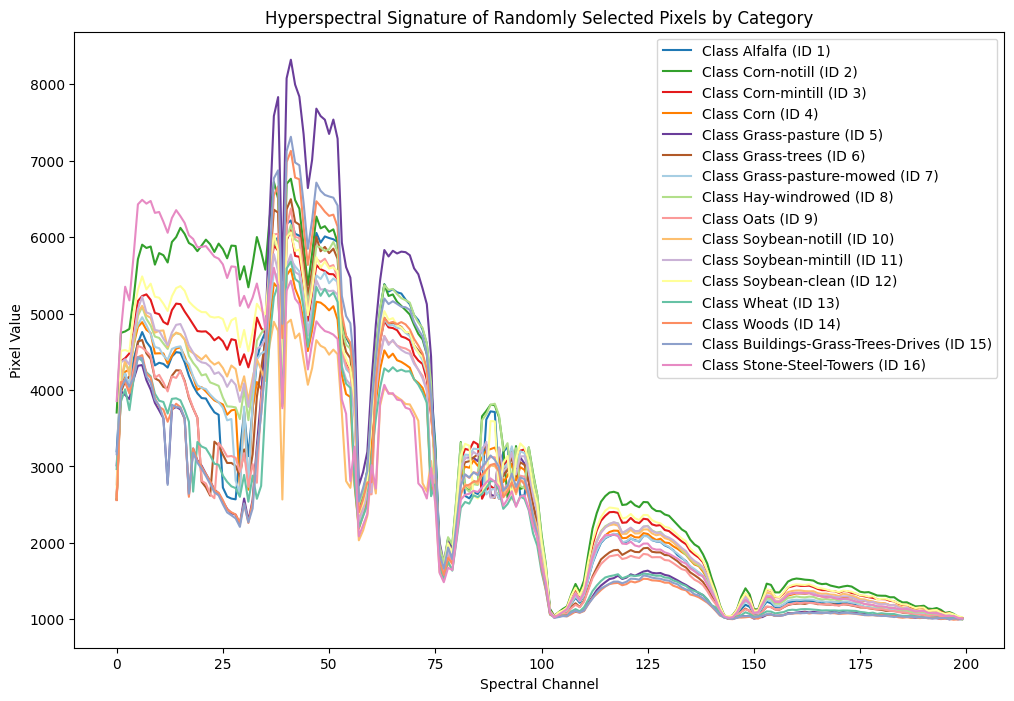

In [11]:
# Plot the hyperspectral signature for each selected pixel

# Define a custom color palette with distinct colors
custom_colors = ['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a', '#b15928', '#a6cee3', '#b2df8a', '#fb9a99', '#fdbf6f', '#cab2d6', '#ffff99', '#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a8786e', '#d73027', '#4575b4']

plt.figure(figsize=(12, 8))

for i, (c_id, pix_value) in enumerate(rand_pixels):
    plt.plot(pix_value, label=f"Class {classes[c_id]} (ID {c_id})", color=custom_colors[i])

  
plt.title("Hyperspectral Signature of Randomly Selected Pixels by Category")
plt.xlabel("Spectral Channel")
plt.ylabel("Pixel Value")
plt.legend()
plt.show()



3. d. Repeat the previous process two more times, drawing the new diagrams.

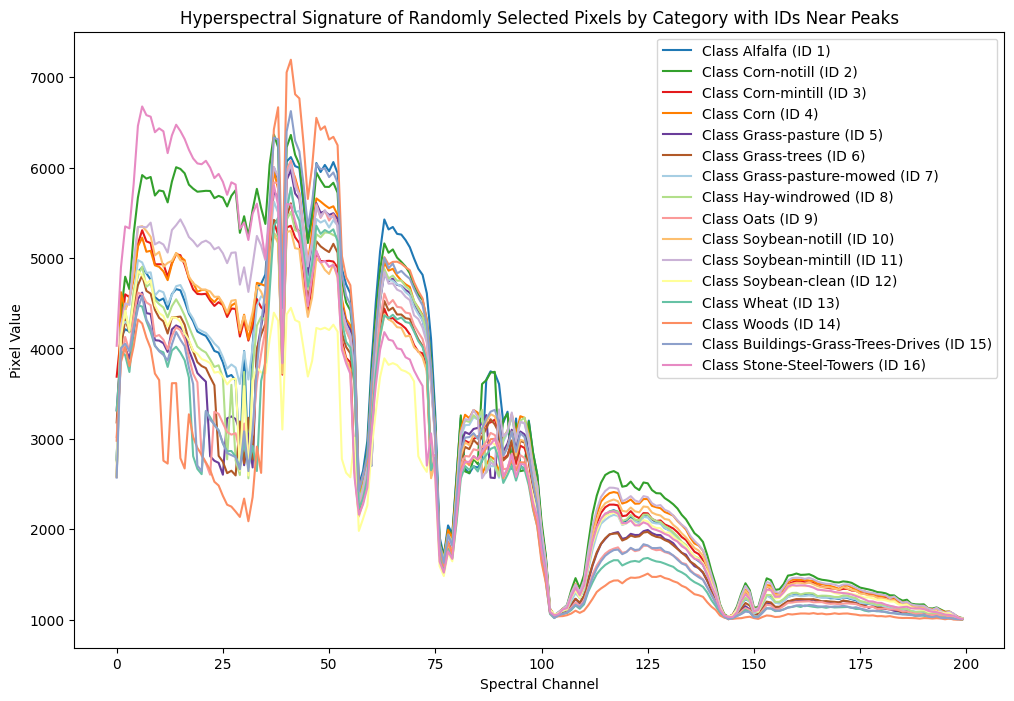

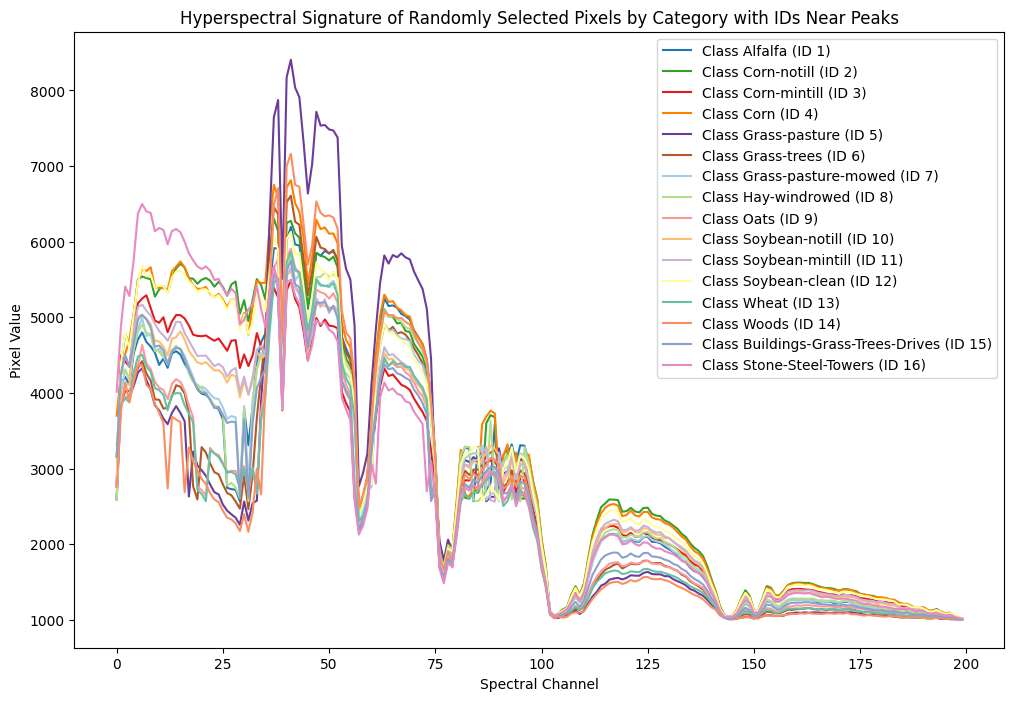

In [12]:
# Function to select a random pixel for each category and plot the hyperspectral signature with class IDs near peaks
def plot_random_pixels_and_signature_with_ids(img, annots, classes):
    unique_classes = np.unique(annots)
    rand_pixels_by_category = []

    # Select a random pixel for each category
    for c_id in unique_classes:
        class_pixels = np.where(annots == c_id)[0]

        # Check if class_pixels is not empty before selecting a random pixel
        if len(class_pixels) > 0:
            rand_pixel_index = np.random.choice(class_pixels)
            rand_pixel = img[rand_pixel_index]
            rand_pixels_by_category.append((c_id, rand_pixel))

    # Define a custom color palette with distinct colors
    custom_colors = ['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a', '#b15928', '#a6cee3', '#b2df8a', '#fb9a99', '#fdbf6f', '#cab2d6', '#ffff99', '#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a8786e', '#d73027', '#4575b4']

    # Plot the hyperspectral signature for each selected pixel
    plt.figure(figsize=(12, 8))

    for i, (c_id, pix_value) in enumerate(rand_pixels_by_category):
        plt.plot(pix_value, label=f"Class {classes[c_id]} (ID {c_id})", color=custom_colors[i])

    plt.title("Hyperspectral Signature of Randomly Selected Pixels by Category with IDs Near Peaks")
    plt.xlabel("Spectral Channel")
    plt.ylabel("Pixel Value")
    plt.legend()
    plt.show()

# Repeat the process two more times
for _ in range(2):
    plot_random_pixels_and_signature_with_ids(filtered_img, filtered_annots, classes)


3.e. Record your observations and conclusions. Try to answer the following questions:
    
* Based on the previous diagrams do you think some crops are more easily distinguishable than others based on their spectral signature?
* Do you think all channels provide useful information for the segmentation?

Plots generated by selecting random pixels for each category provide a snapshot of the variability in hyperspectral signatures within each crop category.

Some crops appear to be more easily distinguished than others based on their spectral signatures. In hyperspectral signature plots, some crops may show distinct patterns or peaks in specific spectral channels, making them easier to identify than others. For example, the class "Stone-Steel-Towers" (ID 16) and the class "Woods" (ID 14) are easily separable from each other because they seem to have very different patterns and values for a large range of channels. While the classes "Soybean-mintill" (ID 11) and "Soybean-clean" (ID 12) are more difficult to separate because their signatures are identical in the majority of channels. If two cultures share similar biochemical properties, they may have overlapping spectral signatures in some channels, making them indistinguishable in those regions.

Furthermore, it is not necessary that all channels provide equally useful information for distinguishing between different crops. In the plots, some spectral channels may contribute more significantly to the separability of crop classes (such as channels 0 to 30, where each crop type is more easily separable), while others may not show distinct patterns (such as channels 175 to 200 , where raft crop types are identified). In addition, some channels may have very similar spectral signatures compared to other channels, resulting in no useful information for crop separation.

3. f. Draw a heatmap, showing the correlation between the different channels

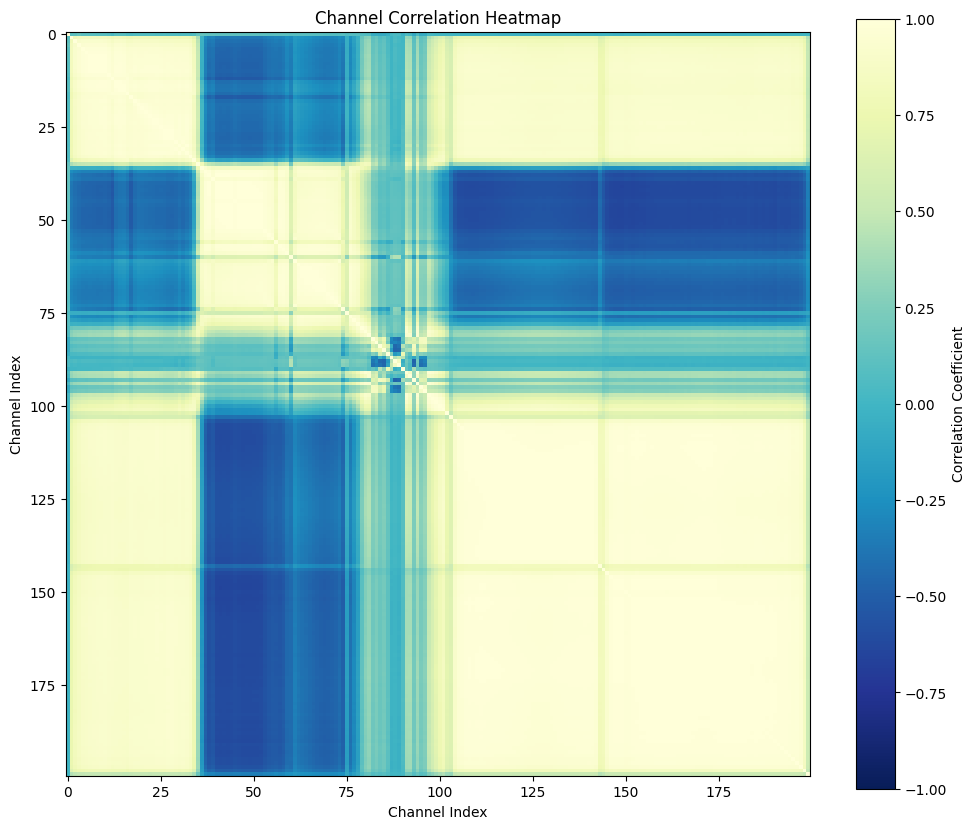

In [13]:
# Calculate the correlation matrix between channels
corr_matrix = np.corrcoef(filtered_img.T)

# Plot the heatmap showing the correlation between channels
plt.figure(figsize=(12, 10))
plt.imshow(corr_matrix, cmap='YlGnBu_r', vmin=-1, vmax=1)
plt.colorbar(label='Correlation Coefficient')
plt.title('Channel Correlation Heatmap')
plt.xlabel('Channel Index')
plt.ylabel('Channel Index')
plt.show()


The heatmap visually represents the correlation between different spectral channels.
High correlation indicates redundancy and low correlation indicates channels that may contribute unique information.

### 4. Clustering using the k-Means algorithm

4.a. Apply the k-Means algorithm (sklearn.cluster) to the data (if you preprocessed Step 3). Use the value `n_cluster=16`.

In [14]:
from sklearn.cluster import KMeans

# Specify the number of clusters
n_clusters = 16

# Apply k-Means algorithm
kmeans = KMeans(n_clusters=n_clusters,init='k-means++', n_init=20, random_state=42)

kmeans.fit(filtered_img)

cluster_labels = kmeans.labels_

# Print the cluster labels and the reduced annotation labels side by side
print("Cluster Labels")
for label, count in zip(*np.unique(cluster_labels, return_counts=True)):
    print(f"Cluster Label: {label}, Count: {count}")


Cluster Labels
Cluster Label: 0, Count: 558
Cluster Label: 1, Count: 1563
Cluster Label: 2, Count: 646
Cluster Label: 3, Count: 507
Cluster Label: 4, Count: 466
Cluster Label: 5, Count: 794
Cluster Label: 6, Count: 537
Cluster Label: 7, Count: 478
Cluster Label: 8, Count: 78
Cluster Label: 9, Count: 859
Cluster Label: 10, Count: 1477
Cluster Label: 11, Count: 301
Cluster Label: 12, Count: 756
Cluster Label: 13, Count: 631
Cluster Label: 14, Count: 172
Cluster Label: 15, Count: 426


K-Means is a clustering algorithm used to divide a data set into K clusters. It works through an iterative process of assigning data points to clusters based on the nearest centroid and updating the centroids until convergence. The algorithm requires the specification of the desired number of clusters (K).

4.b. Compute the following metrics of the algorithm's predictions

* Accuracy Score
* Rand Score
* Silhouette Score

Note that for the rand_score function you can give as input the original labels given to you along with the predicted ones. But to calculate the accuracy, we should match the different IDs of the clusters in the output of KMeans, with the categories of the original annotation. For this conversion you can use the following function given to you `translate_predicted_labels`.

In [15]:
from munkres import Munkres
from sklearn.metrics import silhouette_score
from sklearn.metrics import rand_score
from sklearn.metrics import accuracy_score

def make_cost_matrix(c1, c2):
    """
    """
    uc1 = np.unique(c1)
    uc2 = np.unique(c2)
    l1 = uc1.size
    l2 = uc2.size
    assert(l1 == l2 and np.all(uc1 == uc2))

    m = np.ones([l1, l2])
    for i in range(l1):
        it_i = np.nonzero(c1 == uc1[i])[0]
        for j in range(l2):
            it_j = np.nonzero(c2 == uc2[j])[0]
            m_ij = np.intersect1d(it_j, it_i)
            m[i,j] =  -m_ij.size
    return m

def translate_clustering(clt, mapper):
    return np.array([ mapper[i] for i in clt ])

def accuracy(cm):
    """computes accuracy from confusion matrix"""
    return np.trace(cm, dtype=float) / np.sum(cm)


def translate_predicted_labels(predicted_y, y):
    cost_matrix = make_cost_matrix(predicted_y, y)
    m = Munkres()
    indexes = m.compute(cost_matrix)
    mapper = { old: new for (old, new) in indexes }

    for old, new in mapper.items():
        print("map: %s --> %s" %(old, new))

    translated_predicted_y = translate_clustering(predicted_y, mapper)
    return translated_predicted_y

# usage:
# translate_predicted_labels(predicted, gt)
# predicted: N, array of predicted labels (predicted cluster IDs)
# gt: N, array of ground truth classes

filteredannots = np.array(filtered_annots)-1

trans_cluster_labels = translate_predicted_labels(cluster_labels,filteredannots)

acc_score = accuracy_score(filteredannots, trans_cluster_labels)
print('Accuracy score:',acc_score)

silhouette_avg = silhouette_score(filtered_img, cluster_labels)
print('Silhouette score:',silhouette_avg)

randScore = rand_score(filtered_annots,cluster_labels)
print('Rand score:', randScore)



map: 0 --> 4
map: 1 --> 2
map: 2 --> 12
map: 3 --> 1
map: 4 --> 14
map: 5 --> 11
map: 6 --> 5
map: 7 --> 0
map: 8 --> 15
map: 9 --> 9
map: 10 --> 10
map: 11 --> 7
map: 12 --> 13
map: 13 --> 3
map: 14 --> 8
map: 15 --> 6
Accuracy score: 0.3475461020587374
Silhouette score: 0.2833942114940286
Rand score: 0.8508678023384776


* Accuracy = Accuracy measures the proportion of correctly assigned data points among all data points. Accuracy = Number of correctly assigned points / Total number of points
* The Rand Score measures the similarity between true and predicted cluster assignments, providing a measure of the pairwise agreement between data points in their cluster assignments. Rand Index = Number of matching pairs / Total number of pairs
* Silhouette Score quantifies how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, where a high value indicates that the object matches well with its own cluster and poorly matches neighboring clusters. Silhouette Score = b−a / max(a,b), where a is the average value from the other points in the same cluster and b is the average distance from the nearest cluster that the point is not a part of.
<br>

Additionally, in this piece of code, the mapping between the predicted cluster labels and the ground truth labels is done. The numbers on the left side represent the original cluster IDs and the numbers on the right side represent the corresponding ground truth cluster IDs.

4.c. Draw the confusion matrix (use the matched predicted labels).

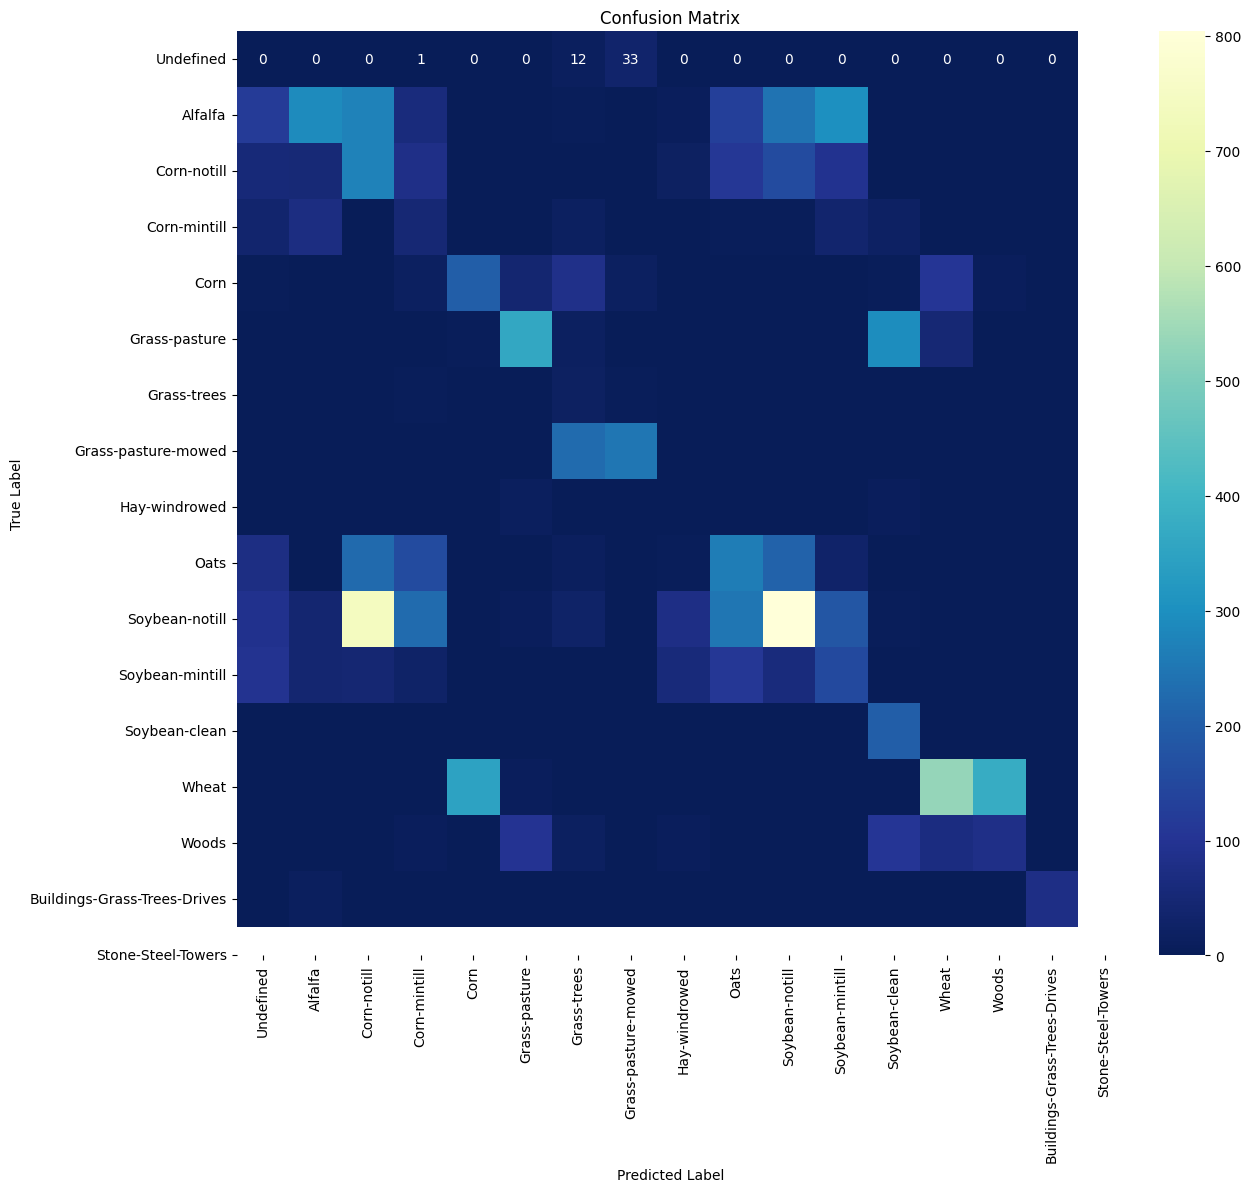

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
conf_matrix = confusion_matrix(filteredannots, trans_cluster_labels)

# Set figure size
plt.figure(figsize=(14, 12))

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu_r', xticklabels=classes, yticklabels=classes, annot_kws={"size": 10})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


4.d. As in 2.d. plot using matplotlib the predicted labels in image format.

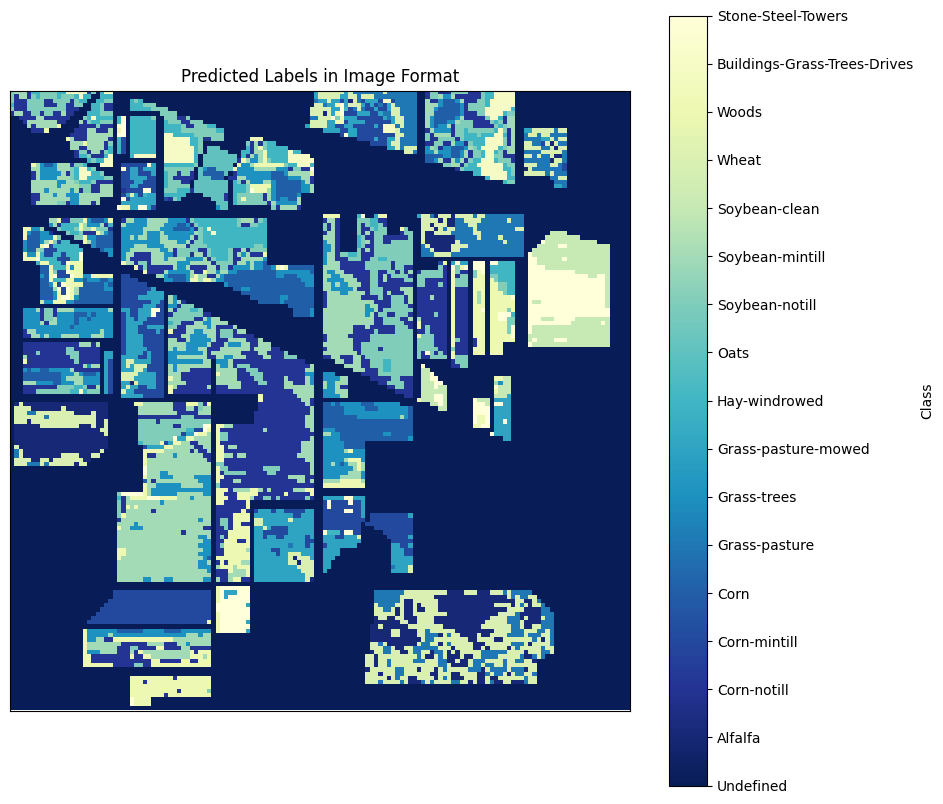

In [17]:
# Plot the predicted labels in image format
plt.figure(figsize=(10, 10))

reconstructed_annots = []
i = 0
for pixel in range(len(reshaped_annots)):
    if reshaped_annots[pixel] > 0:
        reconstructed_annots.append(cluster_labels[i]+1)
        i+=1
    else :
        reconstructed_annots.append(0)
        
row = annots.shape[0]
column = annots.shape[1]
reconstructed_img = np.array(reconstructed_annots)
new_hsi = reconstructed_img.reshape(row, column)


plt.imshow(new_hsi, cmap='YlGnBu_r', vmin=0, vmax=len(classes)-1)
plt.title("Predicted Labels in Image Format")
plt.colorbar(ticks=range(len(classes)), label="Class").set_ticklabels(classes)
plt.xticks([])
plt.yticks([])
plt.show()


### 5. Data dimensionality reduction

5.a. Apply the PCA dimensionality reduction method to the data. Select `n_components=3`

In [18]:
from sklearn.decomposition import PCA

# Specify the number of components
n_comp = 3

# Apply PCA to the data
pca = PCA(n_components=n_comp)
pca_res = pca.fit_transform(filtered_img)

# Display the shape of the reduced data
print("Shape of reduced data:", pca_res.shape)


Shape of reduced data: (10249, 3)


5.b. What percentage of the data variance do you retain with `n_components=3` ?
Hint: sklearn.decomposition.PCA.explained_variance_ratio_

In [19]:
# Display the explained variance ratio for each component
explained_var_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio for each component:", explained_var_ratio)

# Calculate the total variance retained
total_var_retained = explained_var_ratio.sum() * 100
print(f"Total Variance Retained with {n_comp} components: {total_var_retained:.2f}%")


Explained Variance Ratio for each component: [0.66452713 0.2654258  0.01206197]
Total Variance Retained with 3 components: 94.20%


The total percentage of variance is 94.20% and indicates that by retaining the first three components, we retain approximately 94.20% of the total variance in our data set. This suggests that the first three components capture the vast majority of information in our data set.

### 6. Combination of dimensionality reduction and k-Means

6.a. Apply the kmeans algorithm to the reduced dimensionality `n_components=3` data, and recalculate the metrics of Step 4.b.

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, rand_score, silhouette_score
from munkres import Munkres

# Apply k-Means algorithm to the reduced data
kmeans_pca = KMeans(n_clusters=n_clusters,init='k-means++', n_init=20, random_state=42)
kmeans.fit(pca_res)
labels_pca = kmeans.labels_

filteredannots = np.array(filtered_annots)-1

trans_labels_pca = translate_predicted_labels(cluster_labels,filteredannots)

accuracy_pca = accuracy_score(filteredannots, trans_labels_pca)
rand_score_pca = rand_score(filteredannots, trans_labels_pca)
silhouette_avg_pca = silhouette_score(pca_res, labels_pca)

print("Metrics after PCA (n_components=3):")
print(f"Accuracy Score (PCA): {accuracy_pca}")
print(f"Adjusted Rand Score (PCA): {rand_score_pca}")
print(f"Silhouette Score (PCA): {silhouette_avg_pca}\n")

map: 0 --> 4
map: 1 --> 2
map: 2 --> 12
map: 3 --> 1
map: 4 --> 14
map: 5 --> 11
map: 6 --> 5
map: 7 --> 0
map: 8 --> 15
map: 9 --> 9
map: 10 --> 10
map: 11 --> 7
map: 12 --> 13
map: 13 --> 3
map: 14 --> 8
map: 15 --> 6
Metrics after PCA (n_components=3):
Accuracy Score (PCA): 0.3475461020587374
Adjusted Rand Score (PCA): 0.8508678023384776
Silhouette Score (PCA): 0.3746252164012979



6.b. Try different values for `n_components` (from 1 to 10) and for each of these values rerun k-Means, computing the final scores. For each metric, make a graph that has the number of `n_components' on the X-axis and the value of the metric on the Y-axis. What conclusions do you draw?

In [21]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, rand_score, silhouette_score
import numpy as np

# Define a range of n_components values
n_comp_values = range(1, 11)

# Lists to store metric scores
accuracy_scores = []
rand_scores = []
silhouette_scores = []

for n_comp in n_comp_values:
    # Apply PCA
    pca = PCA(n_components=n_comp)
    pca_res = pca.fit_transform(filtered_img)

    # Apply k-Means to the reduced data
    kmeans_pca = KMeans(n_clusters=n_clusters,init='k-means++', n_init=20, random_state=42)
    kmeans.fit(pca_res)
    labels_pca = kmeans.labels_
    
    filteredannots = np.array(filtered_annots)-1

    trans_labels_pca = translate_predicted_labels(labels_pca,filteredannots)
    
    # Calculate metrics
    accuracy_pca = accuracy_score(filteredannots, trans_labels_pca)
    rand_score_pca = rand_score(filteredannots, trans_labels_pca)
    silhouette_avg_pca = silhouette_score(pca_res, labels_pca)

    # Append scores to lists
    accuracy_scores.append(accuracy_pca)
    rand_scores.append(rand_score_pca)
    silhouette_scores.append(silhouette_avg_pca)

    # Print the results for each n_comp value
    print(f"\nResults for n_components={n_comp}:")
    print(f"Cluster Labels (before translation): {labels_pca}")
    print(f"Translated Cluster Labels (after translation): {trans_labels_pca}")
    print("\nMetrics after PCA:")
    print(f"Accuracy Score (PCA): {accuracy_pca}")
    print(f"Rand Score (PCA): {rand_score_pca}")
    print(f"Silhouette Score (PCA): {silhouette_avg_pca}\n")


map: 0 --> 10
map: 1 --> 12
map: 2 --> 8
map: 3 --> 6
map: 4 --> 1
map: 5 --> 11
map: 6 --> 7
map: 7 --> 14
map: 8 --> 15
map: 9 --> 5
map: 10 --> 9
map: 11 --> 4
map: 12 --> 13
map: 13 --> 3
map: 14 --> 0
map: 15 --> 2

Results for n_components=1:
Cluster Labels (before translation): [15  0  0 ...  5  5 15]
Translated Cluster Labels (after translation): [ 2 10 10 ... 11 11  2]

Metrics after PCA:
Accuracy Score (PCA): 0.33769148209581423
Rand Score (PCA): 0.844536726379657
Silhouette Score (PCA): 0.5294956205308419

map: 0 --> 4
map: 1 --> 2
map: 2 --> 8
map: 3 --> 11
map: 4 --> 1
map: 5 --> 3
map: 6 --> 5
map: 7 --> 15
map: 8 --> 9
map: 9 --> 13
map: 10 --> 7
map: 11 --> 6
map: 12 --> 0
map: 13 --> 12
map: 14 --> 14
map: 15 --> 10

Results for n_components=2:
Cluster Labels (before translation): [ 8 15 15 ... 11 11 11]
Translated Cluster Labels (after translation): [ 9 10 10 ...  6  6  6]

Metrics after PCA:
Accuracy Score (PCA): 0.3396428919894624
Rand Score (PCA): 0.853115236999950

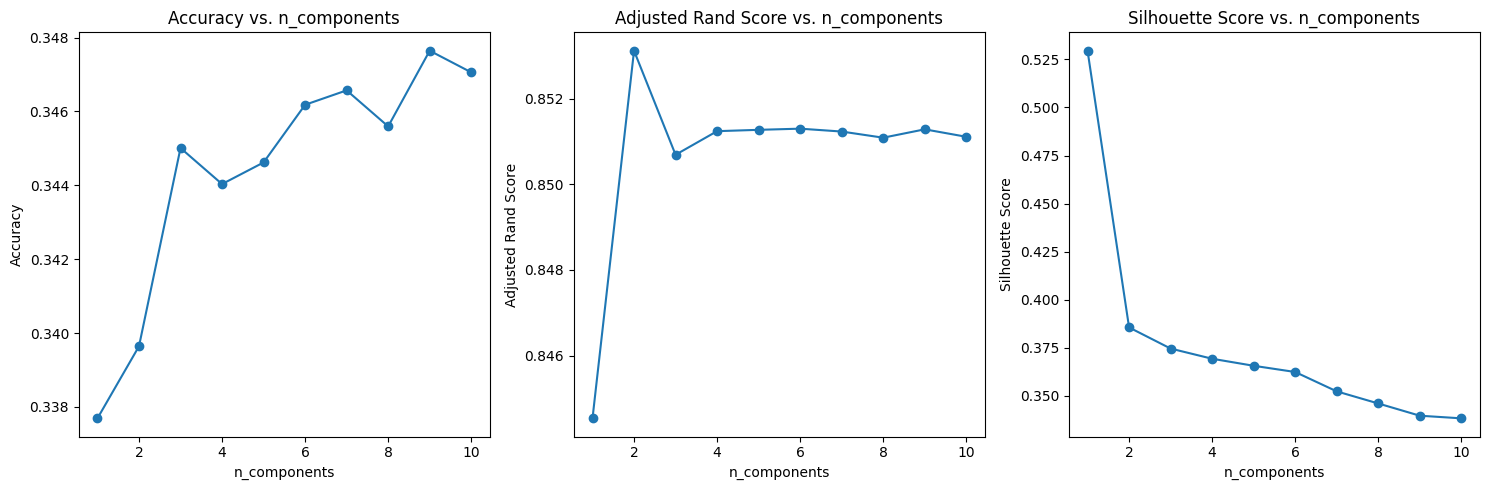

In [22]:
# Plot the metrics for different n_components values
plt.figure(figsize=(15, 5))

# Accuracy Score
plt.subplot(1, 3, 1)
plt.plot(n_comp_values, accuracy_scores, marker='o')
plt.title('Accuracy vs. n_components')
plt.xlabel('n_components')
plt.ylabel('Accuracy')

# Adjusted Rand Score
plt.subplot(1, 3, 2)
plt.plot(n_comp_values, rand_scores, marker='o')
plt.title('Adjusted Rand Score vs. n_components')
plt.xlabel('n_components')
plt.ylabel('Adjusted Rand Score')

# Silhouette Score
plt.subplot(1, 3, 3)
plt.plot(n_comp_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. n_components')
plt.xlabel('n_components')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


In [22]:
# Print accuracy scores, rand score, and silhouette for each n_components
for n_comp, accuracy, rand_score, silhouette in zip(n_comp_values, accuracy_scores, rand_scores, silhouette_scores):
    print(f"n_components: {n_comp}, Accuracy: {accuracy}, Rand Score: {rand_score}, Silhouette Score: {silhouette}")

n_components: 1, Accuracy: 0.33769148209581423, Rand Score: 0.844536726379657, Silhouette Score: 0.5294956205308409
n_components: 2, Accuracy: 0.3396428919894624, Rand Score: 0.8531152369999503, Silhouette Score: 0.3856087440697747
n_components: 3, Accuracy: 0.3450092691969948, Rand Score: 0.85068707603773, Silhouette Score: 0.374625216619035
n_components: 4, Accuracy: 0.34403356425017073, Rand Score: 0.851237899944771, Silhouette Score: 0.3693294278204583
n_components: 5, Accuracy: 0.34461898721826517, Rand Score: 0.8512689762615785, Silhouette Score: 0.36567313650201
n_components: 6, Accuracy: 0.34618011513318375, Rand Score: 0.851296263248089, Silhouette Score: 0.3624360372753399
n_components: 7, Accuracy: 0.34657039711191334, Rand Score: 0.8512290073957826, Silhouette Score: 0.3523659285793962
n_components: 8, Accuracy: 0.34559469216508926, Rand Score: 0.8510855841003204, Silhouette Score: 0.3460744641811418
n_components: 9, Accuracy: 0.3476436725534198, Rand Score: 0.8512807250896

The choice of the number of n_components involves a trade-off between accuracy and complexity of the representation.
While the Accuracy and Rand Score show a modest improvement with increasing components, the Silhouette Score decreases, suggesting that a simpler representation may be preferable.

Accuracy values remain relatively constant across different component numbers. The deviation is not substantial, suggesting that the model's ability to correctly classify the data points does not significantly improve with increasing number of elements.

The Rand Score shows a similar pattern, with limited improvement as the number of items increases. This suggests that grouping assignments do not benefit significantly from additional items beyond a certain point.

The fact that the Silhouette Score decreases indicates that as you increase the number of elements, the clusters become less well defined or separated. This drop can be a sign of overfitting or introducing noise with too many components.

From the plots we can see that from a point on, increasing n_components does not provide a significant improvement to the system. In particular, for n_components = 6 we have in my opinion a very satisfactory trade-off, as we have quite high accuracy values, which means that the labels are quite correct and the Silhouette Score has not decreased much which means that the clusters are quite well certain. But in the end, the values are very close so the n_component option won't affect the performance much.